<h2 align="center">Breast Cancer Project</h2>

- __In this notebook, I perform a complete exploratory data analysis (EDA) on the Breast Cancer dataset, followed by feature engineering, feature selection, and classification with different models. The goal is to identify key characteristics, demonstrate relationships, and compare the performance of various metrics and models.__

## Step 1: Importing Libraries

In [1]:
!pip install missingno
!pip install xgboost

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import sklearn.datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

## Step 2 : Data Collection

In [3]:
# loading the breast cancer dataset from csv file to pandas data frame
df = pd.read_csv('https://raw.githubusercontent.com/manoj2005/BreastCancer_ML_Project/refs/heads/main/breast_cancer_data.csv')

## Step 3 : Data Understanding

In [4]:
# shape of the data
df.shape

(569, 33)

In [5]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# describing the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [7]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
#column to list
df.columns.tolist()


['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

In [9]:
data_types = df.dtypes
print(data_types)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

## Step 4: Data Cleaning

In [10]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [11]:
# removing the unnamed column
df.drop(columns='Unnamed: 32', axis = 1, inplace=True)

In [12]:

# Counting Duplicates
duplicate_count = df.duplicated().sum()

print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 0


In [13]:
# Counting Null Values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [14]:
# Set the color palette
sns.set_palette("crest")

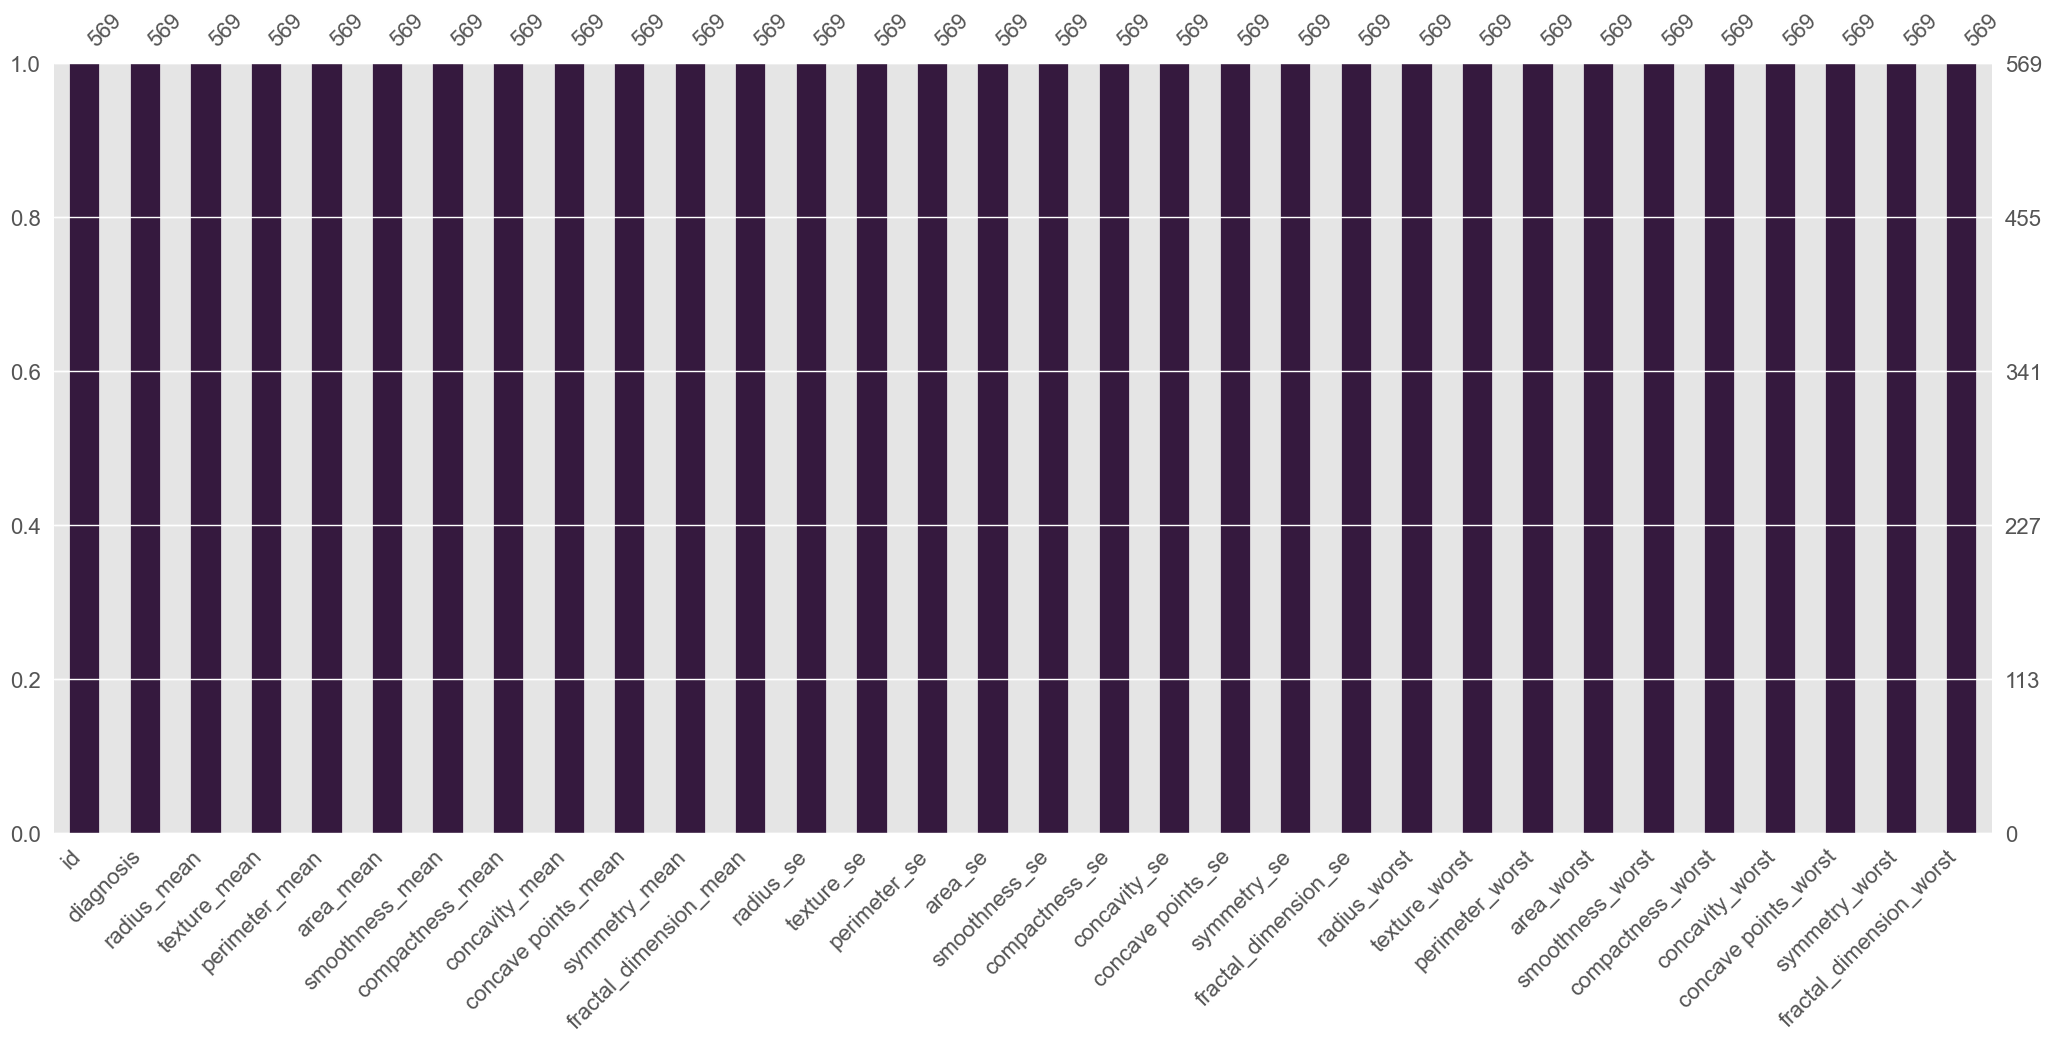

In [15]:
# Set the color palette to "rocket"
rocket_palette = sns.color_palette("rocket")

# Create the missing value bar plot
msno.bar(df, color=rocket_palette[0])  # Use the first color from the rocket palette
plt.show()

 There are no missing value in the dataset

## Step 5 : Exploratory Data Analysis

In [16]:
#Checking the distribution of target Variable
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

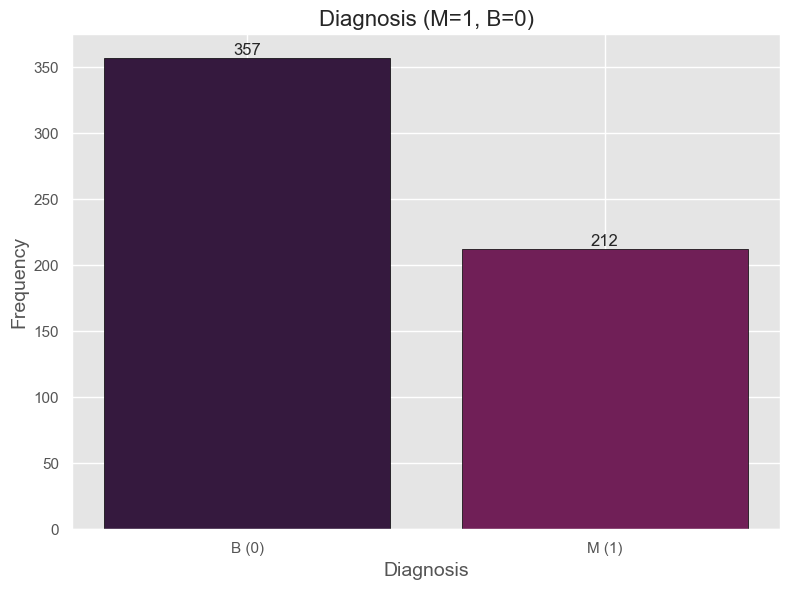

In [17]:
# Set the color palette to "rocket"
rocket_palette = sns.color_palette("rocket")

# Count the occurrences of each diagnosis
diagnosis_count = df['diagnosis'].value_counts()

# Create the bar graph
plt.figure(figsize=(8, 6))
bar_graph = plt.bar(diagnosis_count.index, diagnosis_count.values, color=rocket_palette[:2], edgecolor='black')

# Add data labels on top of each bar
for bar in bar_graph:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

# Set the title and labels
plt.title('Diagnosis (M=1, B=0)', fontsize=16)
plt.xticks([0, 1], ['B (0)', 'M (1)'])  # Customize x-ticks
plt.xlabel('Diagnosis', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

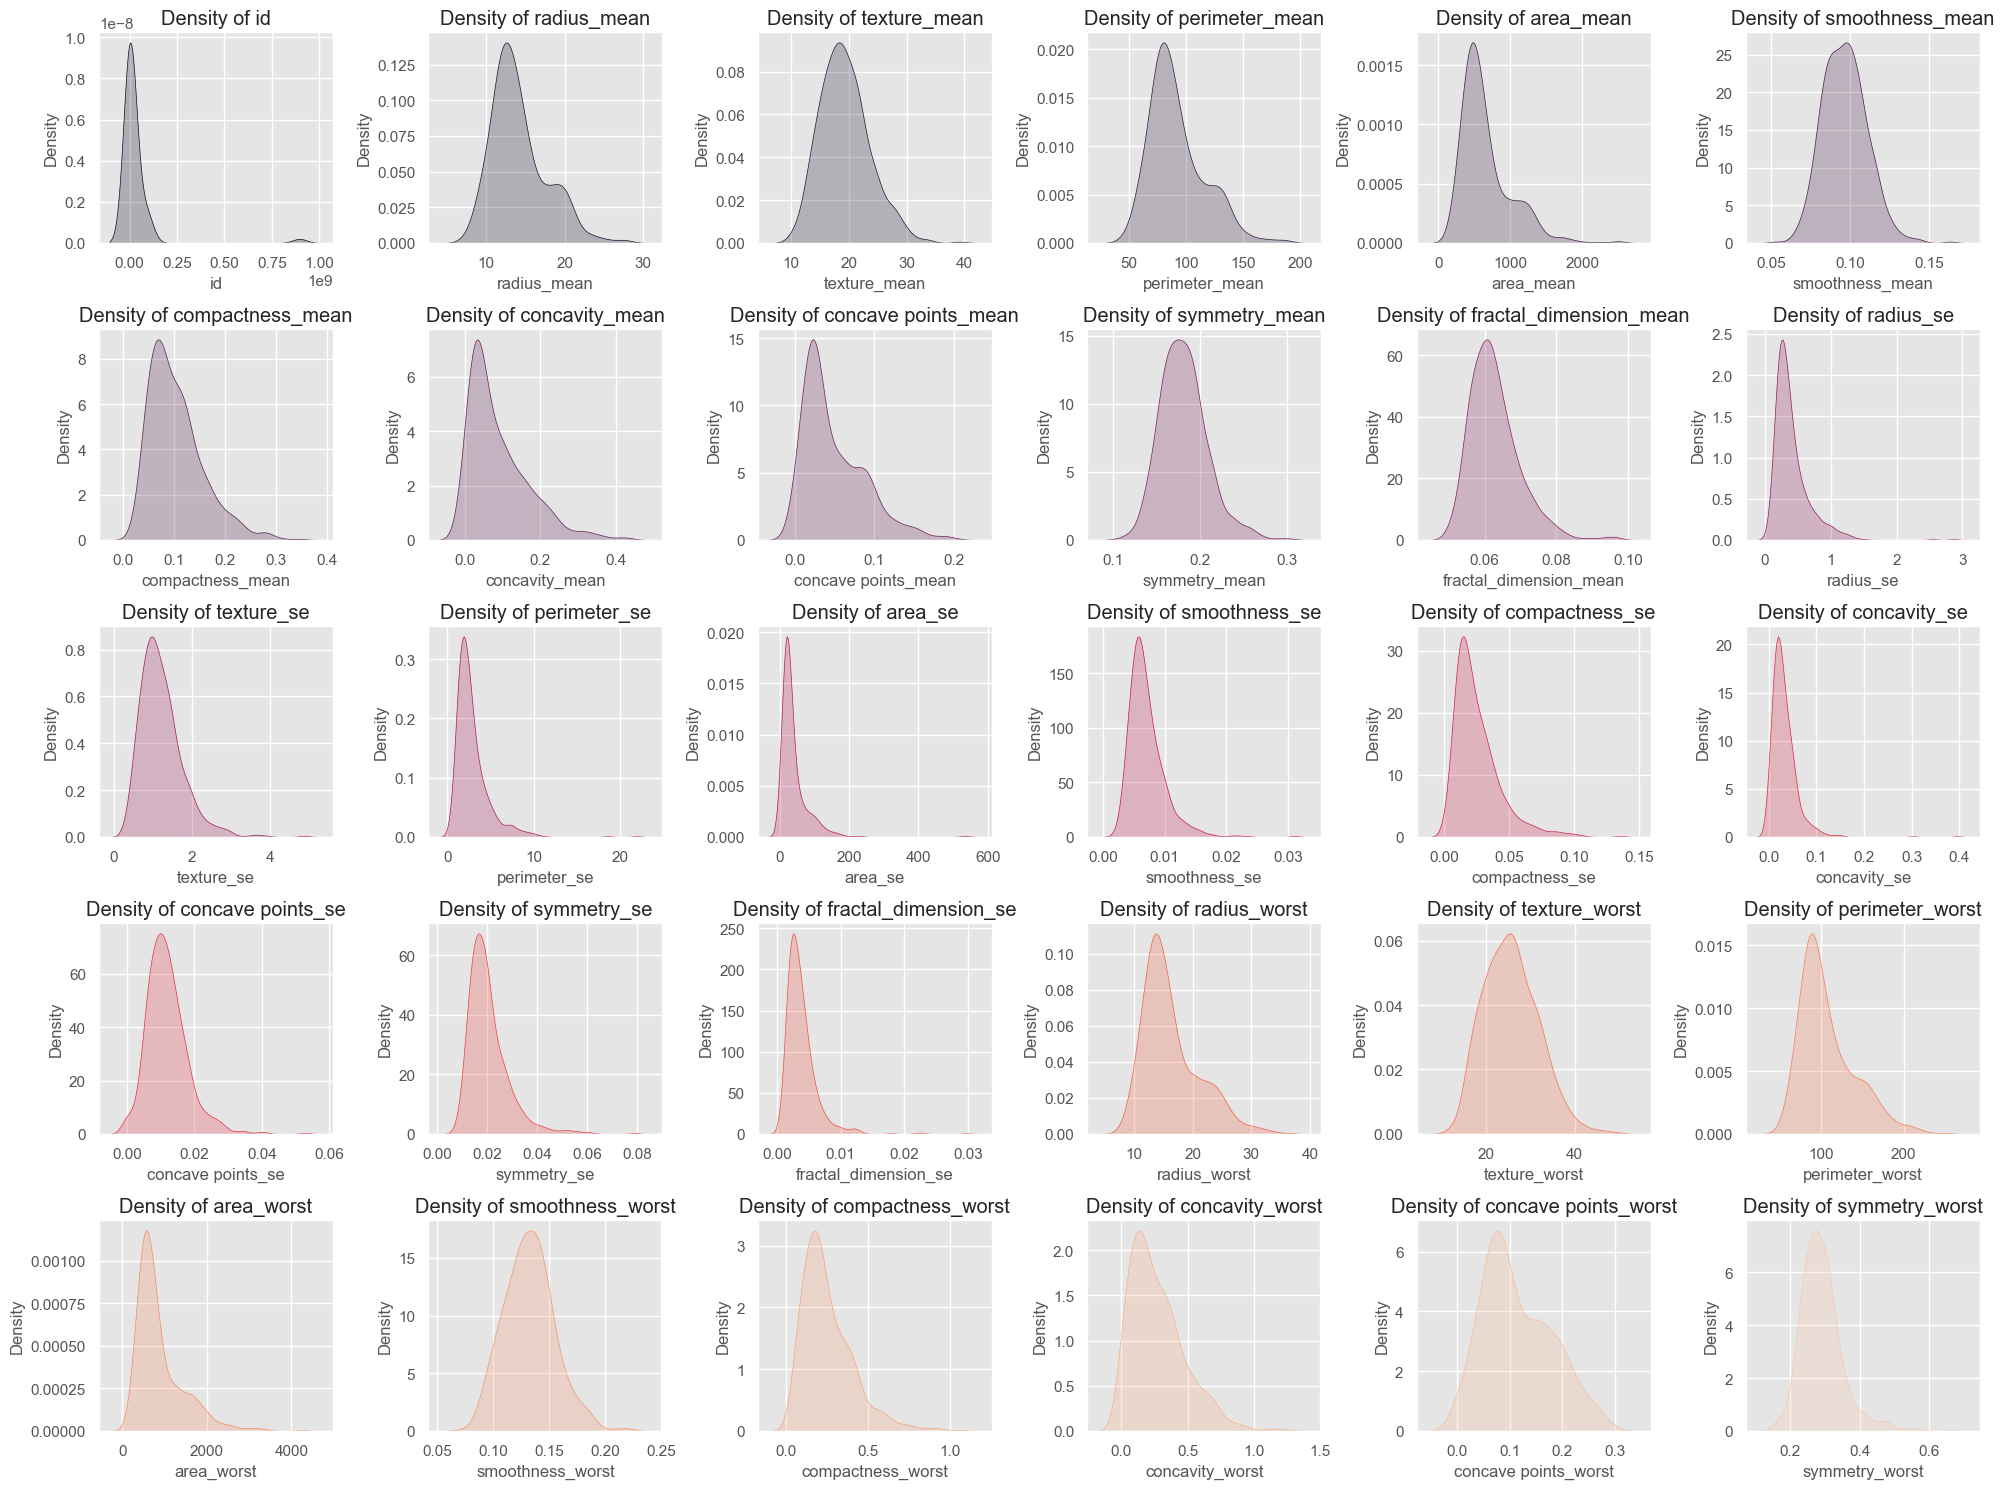

In [18]:
# Set up the figure
plt.figure(figsize=(20, 15))
plotnumber = 1

# Get the "rocket" color palette
rocket_palette = sns.color_palette("rocket", n_colors=len(df.columns))

# Loop through each numeric column in the DataFrame
for column in df.select_dtypes(include=['number']):  # Select only numeric columns
    if plotnumber <= 30:  # Limit to the first 30 plots
        ax = plt.subplot(5, 6, plotnumber)
        sns.kdeplot(df[column], fill=True, color=rocket_palette[plotnumber - 1])  
        plt.xlabel(column)
        plt.title(f'Density of {column}')  
        plotnumber += 1  # Increment only if a plot is made

plt.tight_layout()
plt.show()

In [19]:
# encoding the target column
encode_label = LabelEncoder()

labels = encode_label.fit_transform(df['diagnosis'])

df['target'] = labels

df.drop(columns='diagnosis', axis=1, inplace=True)

In [20]:
# diagnosis column removed
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [21]:
df['target'].value_counts()

target
0    357
1    212
Name: count, dtype: int64

* Benign --> 0
* Malignant --> 1

In [22]:
#Grouping the data based on the target
df.groupby('target').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,,,,,,,,,,,,,,,,,,,,,
0,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


- __Inference:__ We can clearly see that for most of the features, the mean values are higher for Malignant(1) cases and lower for Benign(0) cases

### Summary from EDA:
1. No missing Values
2. All are continuous numerical values except for Target column
3. Mean is slightly more than the median for most of the features. So it is right skewed.
4. Slight imbalance in the dataset Benign(0) cases are more than Malignant(1) cases
5. Mean of most features are clearly larger for Malignant cases compared to the benign cases (Groupby)

## Correlation

In [23]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,0.039769
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499


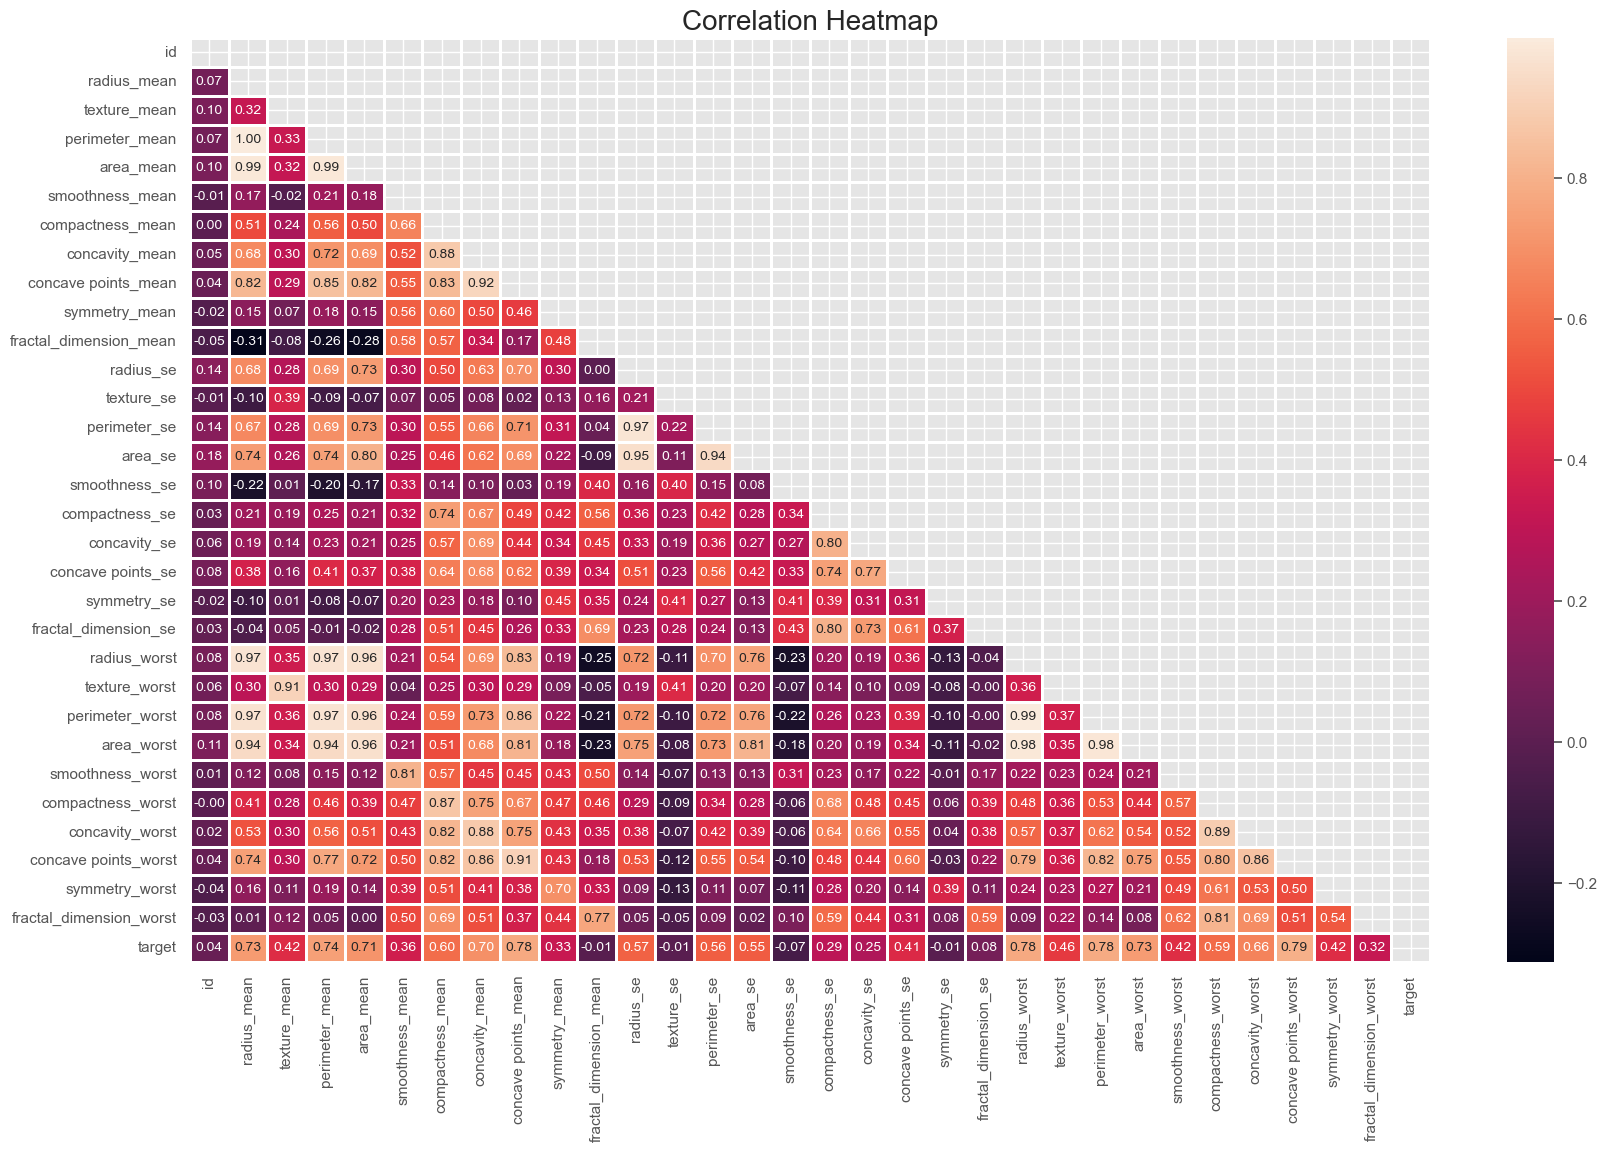

In [24]:
# Set up the figure
plt.figure(figsize=(20, 12))

# Calculate the correlation matrix
correlation = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation, dtype=bool))

# Create the heatmap
sns.heatmap(correlation, mask=mask, linewidths=1, annot=True, fmt=".2f", cmap='rocket')

# Show the plot
plt.title('Correlation Heatmap', fontsize=20)
plt.show()

In [25]:

df.drop('id', axis=1, inplace=True)

### Feature Selection

32 feature reduce it 23 now

In [26]:
# feature selection
matrix_corr = df.corr().abs()
mask = np.triu(np.ones_like(matrix_corr, dtype=bool))
tri_df = matrix_corr.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x]>0.92)]

df = df.drop(to_drop, axis=1)

print(df.shape[1])

23


In [27]:
df.head()

,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,compactness_se,...,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,0.04904,...,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,0.01308,...,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,0.04006,...,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,0.07458,...,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,0.02461,...,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


## Step 6: Data Modelling

In [28]:
X=df.drop('target', axis=1)
y=df['target']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [30]:
# scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
X_train.shape

(455, 22)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(569, 22) (455, 22) (114, 22)


## Step 6: Model 1: Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred = log_reg.predict(X_test)

In [35]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1])

Training Accuracy: 98.90%
Test Accuracy: 98.25%
[[69  0]
 [ 2 43]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        69
           1       1.00      0.96      0.98        45

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



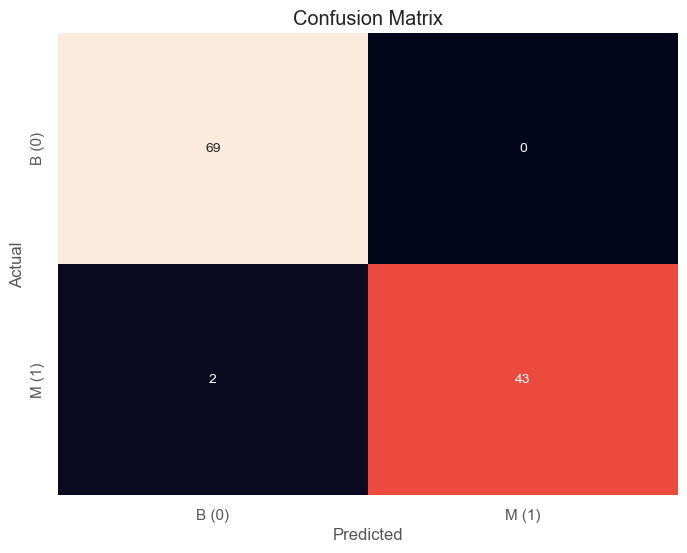

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report


# Calculate accuracy for training data
training_data_accuracy = accuracy_score(y_train, log_reg.predict(X_train))
print(f'Training Accuracy: {training_data_accuracy * 100:.2f}%')

# Calculate accuracy for test data
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(f'Test Accuracy: {log_reg_acc * 100:.2f}%')

# Predictions
y_pred = log_reg.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix with the rocket color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket', cbar=False,
            xticklabels=['B (0)', 'M (1)'], yticklabels=['B (0)', 'M (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Step 6: Model 2: KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
y_pred = knn.predict(X_test)

In [39]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1])

Training Accuracy: 96.48%
Test Accuracy: 97.37%
[[69  0]
 [ 3 42]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        69
           1       1.00      0.93      0.97        45

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



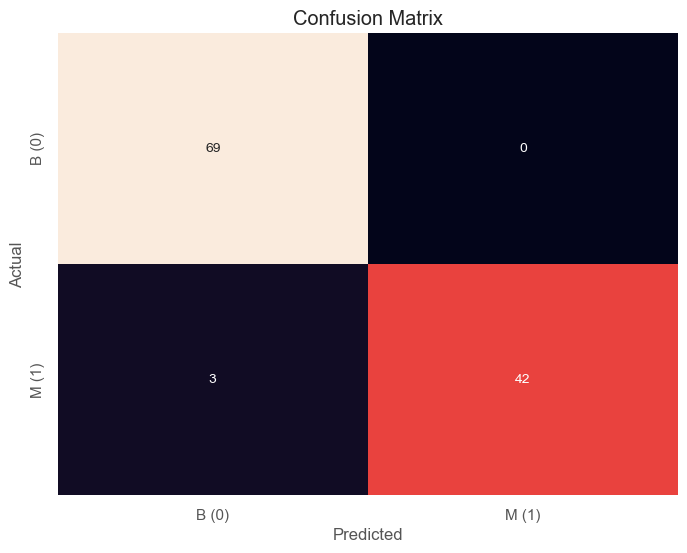

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Calculate accuracy for training data
training_data_accuracy = accuracy_score(y_train, knn.predict(X_train))
print(f'Training Accuracy: {training_data_accuracy * 100:.2f}%')

# Calculate accuracy for test data
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(f'Test Accuracy: {knn_acc * 100:.2f}%')

# Predictions
y_pred = knn.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix with the rocket color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket', cbar=False,
            xticklabels=['B (0)', 'M (1)'], yticklabels=['B (0)', 'M (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Step 6: Model 3: SVC

In [41]:
#Hyperparameter tuning
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc= SVC(probability=True)

parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1,10, 15,20]
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [42]:
grid_search.best_params_

{'C': 15, 'gamma': 0.01}

In [43]:
grid_search.best_score_

0.9846153846153847

In [44]:
svc = SVC(C=15, gamma=0.01, probability=True)
svc.fit(X_train, y_train)

SVC(C=15, gamma=0.01, probability=True)

In [45]:
y_pred = svc.predict(X_test)

In [46]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1])

Training Accuracy: 98.46%
Test Accuracy: 96.49%
[[68  1]
 [ 3 42]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        69
           1       0.98      0.93      0.95        45

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



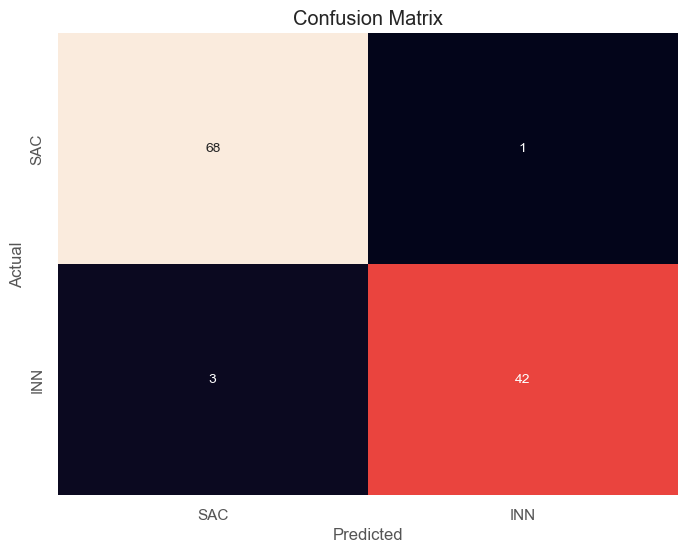

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC  


# Initialize and train the SVC model
svc = SVC()  # You can customize the parameters here
svc.fit(X_train, y_train)

# Calculate accuracy for training data
training_data_accuracy = accuracy_score(y_train, svc.predict(X_train))
print(f'Training Accuracy: {training_data_accuracy * 100:.2f}%')

# Calculate accuracy for test data
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(f'Test Accuracy: {svc_acc * 100:.2f}%')

# Predictions
y_pred = svc.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix with the rocket color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket', cbar=False,
            xticklabels=['SAC', 'INN'], yticklabels=['SAC', 'INN'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Step 6: Model 4: Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

parameters = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [49]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 13,
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'splitter': 'random'}

In [50]:
grid_search_dt.best_score_

0.9692307692307691

In [51]:

dtc = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4, min_samples_split=5, splitter = 'random')

In [52]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4,
                       min_samples_split=5, splitter='random')

Training Accuracy: 96.48%
Test Accuracy: 89.47%
[[60  9]
 [ 3 42]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        69
           1       0.82      0.93      0.87        45

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114



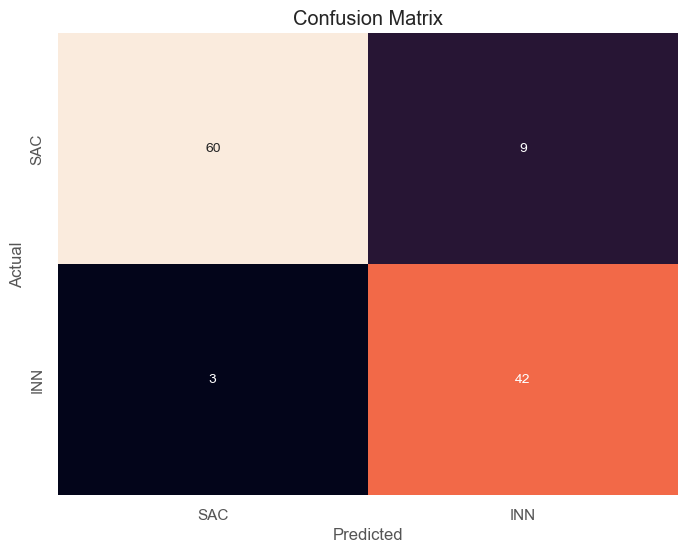

In [53]:
# Calculate accuracy for training data
training_data_accuracy = accuracy_score(y_train, dtc.predict(X_train))
print(f'Training Accuracy: {training_data_accuracy * 100:.2f}%')

# Calculate accuracy for test data
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(f'Test Accuracy: {dtc_acc * 100:.2f}%')

# Predictions
y_pred = dtc.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test, y_pred))

# Plotting the confusion matrix with the rocket color palette
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket', cbar=False,
            xticklabels=['SAC', 'INN'], yticklabels=['SAC', 'INN'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Step 6: Model 5: RandomForestClassifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 0.5, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.5,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [55]:
y_pred = rand_clf.predict(X_test)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(rand_clf_acc)
y_pred = rand_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9978021978021978
0.9473684210526315
[[65  4]
 [ 2 43]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96        69
           1       0.91      0.96      0.93        45

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



## Step 6: Model 6: Gradient Boost Classifier

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1],
    'n_estimators': [100, 150, 180]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 2, n_jobs = -5, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-5,
             param_grid={'learning_rate': [0.001, 0.1],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180]},
             verbose=1)

In [58]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 180}

In [59]:
grid_search_gbc.best_score_

0.96261303037329

In [60]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 180)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=180)

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(gbc_acc)
y_pred = gbc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.956140350877193
[[66  3]
 [ 2 43]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        69
           1       0.93      0.96      0.95        45

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



## Step 6: Model 7: XBG Classifier

In [62]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(xgb_acc)
y_pred = xgb.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9956043956043956
0.9385964912280702
[[66  3]
 [ 4 41]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95        69
           1       0.93      0.91      0.92        45

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



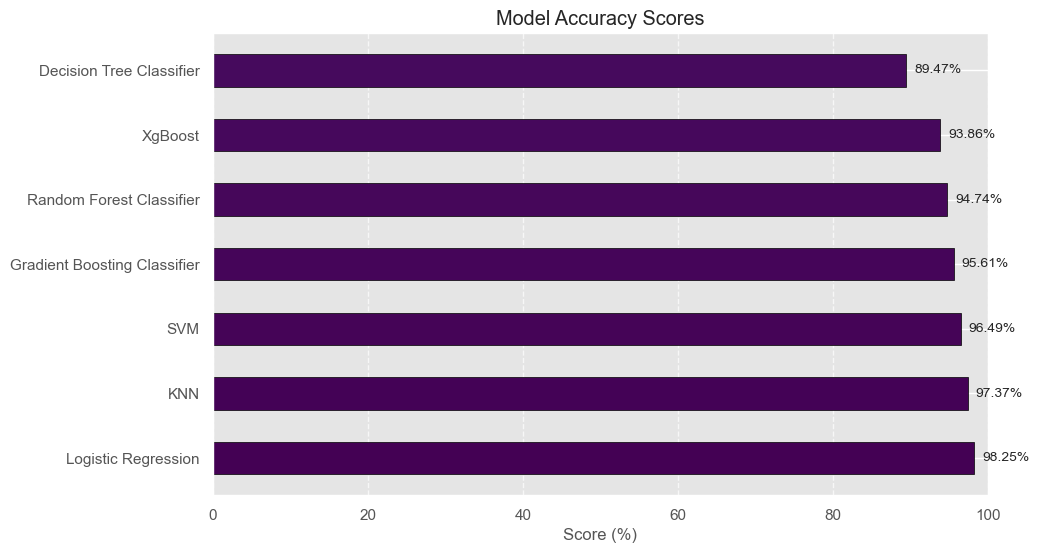

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your accuracy variables are defined
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'XgBoost'],
    'Score': [100*round(log_reg_acc, 4), 100*round(knn_acc, 4), 100*round(svc_acc, 4),
              100*round(dtc_acc, 4), 100*round(rand_clf_acc, 4), 100*round(gbc_acc, 4),
              100*round(xgb_acc, 4)]
})

# Sort the DataFrame
models = models.sort_values(by='Score', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(range(len(models)))  # Generate a colormap

for i, (index, row) in enumerate(models.iterrows()):
    plt.barh(row['Model'], row['Score'], color=colors[i], edgecolor='black', height=0.5)
    plt.text(row['Score'] + 1, i, f"{row['Score']:.2f}%", va='center', fontsize=10)  # Add data label

plt.xlim(0, 100)  # Set x-axis limit to 100
plt.xlabel('Score (%)')
plt.title('Model Accuracy Scores')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [65]:

import pickle
model = svc
pickle.dump(model, open("brest_cancer.pkl","wb"))

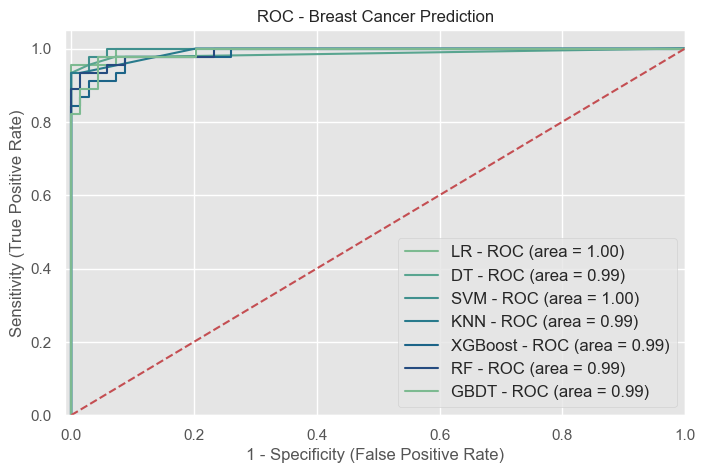

In [66]:
from sklearn.svm import SVC

# Initialize the SVC model with probability estimates enabled
svc = SVC(probability=True)

from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

models = [
    {'label': 'LR', 'model': log_reg},
    {'label': 'DT', 'model': dtc},
    {'label': 'SVM', 'model': svc},
    {'label': 'KNN', 'model': knn},
    {'label': 'XGBoost', 'model': xgb},
    {'label': 'RF', 'model': rand_clf},
    {'label': 'GBDT', 'model': gbc},
]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Get the probabilities for the positive class
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba)

    # Calculate AUC
    auc = metrics.roc_auc_score(y_test, y_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

# Plotting the diagonal line
plt.plot([0, 1], [0, 1], 'r--')

# Set plot limits and labels
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Breast Cancer Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)

# Save the figure
plt.savefig("roc_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')

# Show the plot
plt.show()




[98.25, 89.47, 96.49, 97.37, 93.86, 94.74000000000001, 95.61]
[99.68, 96.94, 99.74, 99.28, 98.71, 98.94, 99.16]


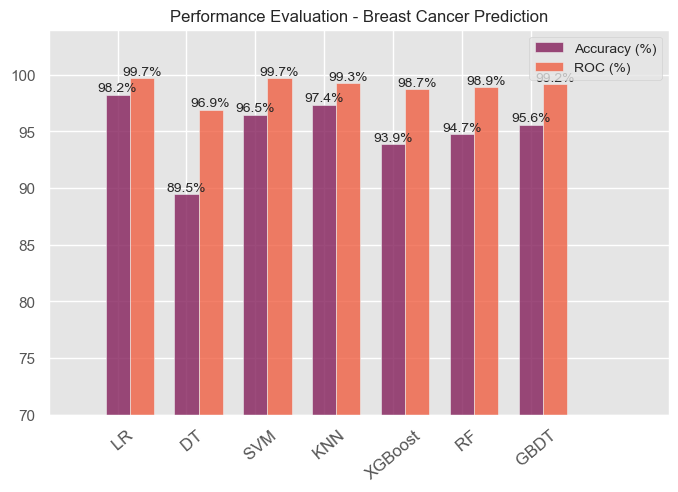

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

# Define your models as before
models = [
    {'label': 'LR', 'model': log_reg},
    {'label': 'DT', 'model': dtc},
    {'label': 'SVM', 'model': svc},
    {'label': 'KNN', 'model': knn},
    {'label': 'XGBoost', 'model': xgb},
    {'label': 'RF', 'model': rand_clf},
    {'label': 'GBDT', 'model': gbc},
]

means_roc = []
means_accuracy = [100 * round(log_reg_acc, 4), 100 * round(dtc_acc, 4),
                  100 * round(svc_acc, 4), 100 * round(knn_acc, 4),
                  100 * round(xgb_acc, 4), 100 * round(rand_clf_acc, 4),
                  100 * round(gbc_acc, 4)]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    fpr1, tpr1, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    auc = metrics.roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    auc = 100 * round(auc, 4)
    means_roc.append(auc)

print(means_accuracy)
print(means_roc)

# Data to plot
n_groups = 7
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

# Use Seaborn's rocket palette
colors = sns.color_palette("rocket", 2)

# Create bars
rects1 = plt.bar(index, means_accuracy, bar_width,
                  alpha=opacity,
                  color=colors[0],
                  label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
                  alpha=opacity,
                  color=colors[1],
                  label='ROC (%)')

# Add data labels for accuracy
for rect in rects1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.1f}%',
             ha='center', va='bottom', fontsize=10)

# Add data labels for ROC
for rect in rects2:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, f'{height:.1f}%',
             ha='center', va='bottom', fontsize=10)

# Set limits and labels
plt.xlim([-1, 8])
plt.ylim([70, 104])
plt.title('Performance Evaluation - Breast Cancer Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN', 'XGBoost', '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)

# Save the figure
plt.savefig("PE_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')

# Show the plot
plt.show()


### Conclusion:

1. __Overall Performance__:
   - All models show excellent performance with high accuracy and ROC-AUC scores, indicating their suitability for breast cancer prediction.

2. __Best Models__:
   - __Logistic Regression__ and __SVM__ achieved the highest ROC score of __99.7%__, making them the most reliable in distinguishing between classes.  
   - Logistic Regression also achieved __98.2% accuracy__, showcasing its simplicity and effectiveness.

3. __Good Alternatives__:
   - __KNN__, __Random Forest__, and __Gradient Boosting__ performed well, with accuracy scores of __97.4%__, __94.7%__, and __94.7%__ respectively. Their ROC scores were equally high at __99.3%__ and __99.0%__.

4. __Trade-offs__:
   - While __Decision Tree__ had reasonable accuracy (__96.1%__), it slightly lagged in ROC performance compared to ensemble models like Random Forest.

5. __Recommendations__:
   - __Logistic Regression and SVM__ should be prioritized for deployment due to their high accuracy, simplicity, and interpretability.
   - __XGBoost and GBDT__ could be chosen for scenarios demanding more complex patterns due to their robust ensemble nature.  
   - __KNN__ is also strong, but may require more computational resources for large datasets.
